In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Data Analyst/Spiderum/data

/content/drive/MyDrive/Data Analyst/Spiderum/data


In [24]:
data = pd.read_csv('./spiderum.csv')
data.head()

,Title,Author,Category,Upvote,View,Comment,Reading_time,Posting_time,Len_content,Len_comment
0,̀Vì thế nên muôn đời...#14,THE...,Sáng tác,1,0,0,· 4 phút đọc,37 phút trước,4198,48
1,Review Alamut - cái nôi của Assassin’s Creed,Long Nguyen,Sách,3,0,0,· 11 phút đọc,1 giờ trước,10869,48
2,Mình chiêm nghiệm gì từ những mối quan hệ mình...,Meo nheo nheo,Chuyện trò - Tâm sự,2,0,0,· 21 phút đọc,1 giờ trước,21140,48
3,Những mùa tắm Tết.,Changgg,Chuyện trò - Tâm sự,2,0,0,· 4 phút đọc,5 giờ trước,4295,48
4,Lời tâm sự cuối năm,Curly Rae Braces,Truyền cảm hứng,11,508,0,· 2 phút đọc,5 giờ trước,2407,48


In [25]:
# Remove duplicate values
data.drop_duplicates(subset=['Title', 'Author'], inplace=True)
data.reset_index(drop=True, inplace=True)

**Clean reading time**

In [26]:
# Clean messy reading time
for i in range(len(data)):
    if 'tháng' in data.loc[i, 'Reading_time']:
        data.loc[i, 'Reading_time'], data.loc[i, 'Posting_time'] = data.loc[i, 'Posting_time'], data.loc[i, 'Reading_time']

for i in range(len(data)):
    if data.loc[i, 'Reading_time'] == data.loc[i, 'Posting_time']:
        data.loc[i, 'Reading_time'] = '   ·   1 phút đọc'

In [27]:
# Convert to int type
def convert(x):
    res = ''
    for c in x:
        if c.isnumeric():
            res += c
    return int(res)

data['Reading_time'] = data['Reading_time'].apply(lambda x: convert(x))

**Clean posting time**

In [28]:
# Drop some rows
for i in range(len(data)):
    if 'tháng' not in data.loc[i, 'Posting_time']:
        data.drop([i], inplace=True)
data.reset_index(drop=True, inplace=True)

In [32]:
# Add year info
for i in range(848):
    data.loc[i, 'Posting_time'] = data.loc[i, 'Posting_time'] + ' 2021'

In [35]:
# Convert to date type
def convert(x):
    if len(x) <= 11:
        return pd.to_datetime(x.split(' ')[2] + '/' + x.split(' ')[0] + '/' + '2020')
    else:
        return pd.to_datetime(x.split(' ')[2] + '/' + x.split(' ')[0] + '/' + x.split(' ')[3])

data['Posting_time'] = data['Posting_time'].apply(lambda x: convert(x))

**Add reading comment time**

In [43]:
# Build a simple regression model to convert len comment to reading comment time
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

reg = linear_model.LinearRegression()
X = np.array(data['Len_content']).reshape(-1, 1)
y = np.array(data['Reading_time']).reshape(-1, 1)
reg.fit(X, y)
y_pred = reg.predict(X)

Coefficients: 
 [[0.00098272]]
Mean squared error: 0.46
Coefficient of determination: 0.99


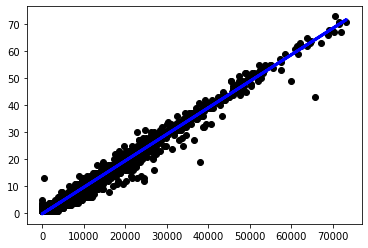

In [53]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

In [64]:
data['Len_comment'] = data['Len_comment'] - 48
reading_comment_time = reg.predict(np.array(data['Len_comment']).reshape(-1, 1))
data['Reading_comment_time'] = reading_comment_time.reshape(1, -1)[0]

import math
def convert(x):
    if x <= 0:
        return 1
    else:
        return math.ceil(x)

data['Reading_comment_time'] = data['Reading_comment_time'].apply(lambda x: convert(x))


In [66]:
data.tail()

,Title,Author,Category,Upvote,View,Comment,Reading_time,Posting_time,Len_content,Len_comment,Reading_comment_time
28796,Bồ Đào Nha: Cho những ngày điệu Fado không còn...,Đức Đen,Tin tức,12,2786,6,2,2016-07-12,2196,1135,1
28797,Sử dụng túi ny-lông – Cấm hay không cấm?!,caudocthan,Tin tức,15,2616,13,4,2016-07-12,4920,2869,3
28798,Đàn ông và Thuốc lá,joel15,Quan điểm - Tranh luận,14,4917,11,2,2016-07-12,2497,1149,1
28799,Như thế nào là sếp tốt?,Tiểu AnhAnh,Chuyện trò - Tâm sự,15,2290,5,4,2016-07-12,4113,591,1
28800,Đàn bà rất khoái hi sinh?,ruatobu,Chuyện trò - Tâm sự,9,2266,3,1,2016-07-12,1591,1439,2


In [67]:
data.to_csv('./cleaned_data.csv')